The code of Spatial Transformer Networks experimenting on MNIST is based on the code in github: https://github.com/zsdonghao/Spatial-Transformer-Nets.git <br>
The code here is part of the progress on learning-based registration project. 

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import sys
import os

import numpy as np
import tensorflow as tf
import Functions 
from importlib import reload
import matplotlib.pyplot as plt
import imp
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [179]:
imp.reload(Functions)
imp.reload(Models)

<module 'Models' from 'D:\\GoogleDrive\\Github\\Spatial-Transformer-Nets\\Models.py'>

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13371894571792659663
]


In [ ]:
!pip uninstall tensorflow

In [186]:
tf.test.is_gpu_available()

False

In [183]:
import keras
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 0} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

AttributeError: module 'tensorflow.python.keras.api._v1.keras.backend' has no attribute 'tensorflow_backend'

In [153]:
## Read the original datasets
## --------------------------------
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

In [154]:
## Enlarge datasets with distortion
## --------------------------------
orig_dims = (28,28)
input_dims = (28,28,1)

X_train_input = Functions.pad_distort_ims_fn(X_train,output_size=input_dims)
X_test_input = Functions.pad_distort_ims_fn(X_test,output_size=input_dims)

X_train_input = np.expand_dims(X_train_input,axis=-1) 
X_test_input = np.expand_dims(X_test_input,axis=-1) 

X_train_input = X_train_input /255.0
X_test_input = X_test_input /255.0

y_train_vec = to_categorical(y_train)
y_test_vec = to_categorical(y_test)

1200it [00:19, 62.15it/s]
200it [00:03, 59.28it/s]


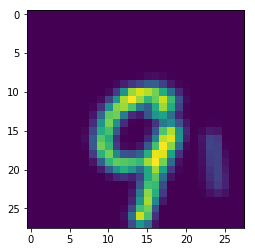

In [169]:
%matplotlib inline
index = np.random.randint(0,10000)

plt.imshow(X_test_input[index].reshape((input_dims[0],input_dims[1])))

plt.show()


In [180]:
layer_nin = tf.keras.layers.Input(shape=input_dims,name='input_layer')
model_block = Models.affine_transformer_mnist_model(input_dims,output_dims)

model_output = model_block(layer_nin)
model = tf.keras.models.Model(inputs=layer_nin,outputs=model_output)

In [109]:
_=plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [181]:
sgd = tf.keras.optimizers.SGD(lr=0.01,momentum=0.9)
adam = tf.keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=['categorical_accuracy'])
#model.compile(optimizer=adam,loss="categorical_crossentropy",metrics=['categorical_accuracy'])

In [137]:
batch_size = 128
epochs=100
model_v1.fit(X_train_input,y_train_vec,validation_data=(X_test_input,y_test_vec),epochs=epochs,batch_size=batch_size,shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
12416/60000 [=====>........................] - ETA: 2:34 - loss: 2.3042 - categorical_accuracy: 0.09 - ETA: 1:05 - loss: 2.3052 - categorical_accuracy: 0.09 - ETA: 46s - loss: 2.3067 - categorical_accuracy: 0.0938 - ETA: 38s - loss: 2.3075 - categorical_accuracy: 0.099 - ETA: 37s - loss: 2.3091 - categorical_accuracy: 0.096 - ETA: 33s - loss: 2.3095 - categorical_accuracy: 0.097 - ETA: 31s - loss: 2.3068 - categorical_accuracy: 0.099 - ETA: 29s - loss: 2.3052 - categorical_accuracy: 0.099 - ETA: 27s - loss: 2.3055 - categorical_accuracy: 0.101 - ETA: 27s - loss: 2.3058 - categorical_accuracy: 0.100 - ETA: 26s - loss: 2.3048 - categorical_accuracy: 0.101 - ETA: 26s - loss: 2.3043 - categorical_accuracy: 0.101 - ETA: 25s - loss: 2.3044 - categorical_accuracy: 0.101 - ETA: 25s - loss: 2.3043 - categorical_accuracy: 0.103 - ETA: 24s - loss: 2.3039 - categorical_accuracy: 0.102 - ETA: 24s - loss: 2.3040 - categorical_accuracy: 0.

KeyboardInterrupt: 

In [67]:
recon_net = tf.keras.models.Model(inputs=model.input,outputs=t_transformer)

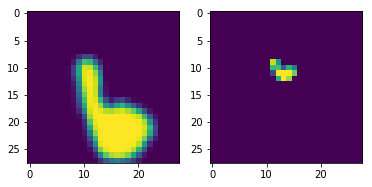

In [100]:
%matplotlib inline
index = np.random.randint(0,10000)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(X_test_input[index].reshape((28,28)))
recon = recon_net.predict(X_test_input[index].reshape(1,28,28,1))
ax2.imshow(recon.reshape((28,28)))
plt.show()
#print(np.max(X_test_28[index]),np.min(X_test_40[index]))
#print(np.max(recon),np.min(recon))

## Sanity Check

In [ ]:
X_train_40[1].shape

In [ ]:
## Load Images

# load 4 cat images
img1 = X_train_40[1]
img2 = X_train_40[2]
img3 = X_train_40[3]
img4 = X_train_40[4]

input_img = np.stack([img1, img2, img3, img4], axis=0)
B, H, W, C = input_img.shape
print("Input Img Shape: {}".format(input_img.shape))

In [ ]:
## Identity Transform

theta = np.array([[100., 0, 0], [0, 100., 0]])

x = tf.placeholder(tf.float32, [None, H, W, C])

with tf.variable_scope('spatial_transformer'):
    theta = theta.astype('float32')
    theta = theta.flatten()

    # define loc net weight and bias
    loc_in = H*W*C
    loc_out = 6
    W_loc = tf.Variable(tf.zeros([loc_in, loc_out]), name='W_loc')
    b_loc = tf.Variable(initial_value=theta, name='b_loc')
    
    # tie everything together
    fc_loc = tf.tanh(tf.matmul(tf.zeros([B, loc_in]), W_loc) + b_loc)
    h_trans = Functions.spatial_transformer_network(x, fc_loc)

In [ ]:
# run session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
y = sess.run(h_trans, feed_dict={x: input_img})
print("y: {}".format(y.shape))


In [ ]:
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
ax1.imshow(input_img[0].reshape((40,40)))
ax2.imshow(y[0].reshape((40,40)))
ax3.imshow(input_img[1].reshape((40,40)))
ax4.imshow(y[1].reshape((40,40)))
ax5.imshow(input_img[2].reshape((40,40)))
ax6.imshow(y[2].reshape((40,40)))
ax7.imshow(input_img[3].reshape((40,40)))
ax8.imshow(y[3].reshape((40,40)))

## Rotation

In [ ]:
# initialize affine transform tensor `theta`
import math
degree = 45
theta = np.array([
    [np.cos(math.radians(degree)), -np.sin(math.radians(degree)), 0], 
    [np.sin(math.radians(degree)), np.cos(math.radians(degree)), 0]
])

In [ ]:
x = tf.placeholder(tf.float32, [None, H, W, C])

with tf.variable_scope('spatial_transformer'):
    theta = theta.astype('float32')
    theta = theta.flatten()

    # define loc net weight and bias
    loc_in = H*W*C
    loc_out = 6
    W_loc = tf.Variable(tf.zeros([loc_in, loc_out]), name='W_loc')
    b_loc = tf.Variable(initial_value=theta, name='b_loc')
    
    # tie everything together
    fc_loc = tf.matmul(tf.zeros([B, loc_in]), W_loc) + b_loc
    h_trans = Functions.spatial_transformer_network(x, fc_loc)

In [ ]:
# run session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
y = sess.run(h_trans, feed_dict={x: input_img})
print("y: {}".format(y.shape))

In [ ]:
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
ax1.imshow(input_img[0].reshape((40,40)))
ax2.imshow(y[0].reshape((40,40)))
ax3.imshow(input_img[1].reshape((40,40)))
ax4.imshow(y[1].reshape((40,40)))
ax5.imshow(input_img[2].reshape((40,40)))
ax6.imshow(y[2].reshape((40,40)))
ax7.imshow(input_img[3].reshape((40,40)))
ax8.imshow(y[3].reshape((40,40)))

## Zoom in

In [ ]:
# initialize affine transform tensor `theta`
import math
degree = 45
theta = np.array([
    [-1*np.cos(math.radians(degree)), -1*-np.sin(math.radians(degree)), 0], 
    [-1*np.sin(math.radians(degree)), -1*np.cos(math.radians(degree)), 0]
])

In [ ]:
x = tf.placeholder(tf.float32, [None, H, W, C])

with tf.variable_scope('spatial_transformer'):
    theta = theta.astype('float32')
    theta = theta.flatten()

    # define loc net weight and bias
    loc_in = H*W*C
    loc_out = 6
    W_loc = tf.Variable(tf.zeros([loc_in, loc_out]), name='W_loc')
    b_loc = tf.Variable(initial_value=theta, name='b_loc')
    
    # tie everything together
    fc_loc = tf.matmul(tf.zeros([B, loc_in]), W_loc) + b_loc
    h_trans = Functions.spatial_transformer_network(x, fc_loc)

In [ ]:
# run session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
y = sess.run(h_trans, feed_dict={x: input_img})
print("y: {}".format(y.shape))

In [ ]:
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
ax1.imshow(input_img[0].reshape((40,40)))
ax2.imshow(y[0].reshape((40,40)))
ax3.imshow(input_img[1].reshape((40,40)))
ax4.imshow(y[1].reshape((40,40)))
ax5.imshow(input_img[2].reshape((40,40)))
ax6.imshow(y[2].reshape((40,40)))
ax7.imshow(input_img[3].reshape((40,40)))
ax8.imshow(y[3].reshape((40,40)))

## Zoom out

In [ ]:
# initialize affine transform tensor `theta`
import math
degree = 45
theta = np.array([
    [3*np.cos(math.radians(degree)), 3*-np.sin(math.radians(degree)), 0], 
    [3*np.sin(math.radians(degree)), 3*np.cos(math.radians(degree)), 0]
])

x = tf.placeholder(tf.float32, [None, H, W, C])

with tf.variable_scope('spatial_transformer'):
    theta = theta.astype('float32')
    theta = theta.flatten()

    # define loc net weight and bias
    loc_in = H*W*C
    loc_out = 6
    W_loc = tf.Variable(tf.zeros([loc_in, loc_out]), name='W_loc')
    b_loc = tf.Variable(initial_value=theta, name='b_loc')
    
    # tie everything together
    fc_loc = tf.matmul(tf.zeros([B, loc_in]), W_loc) + b_loc
    h_trans = Functions.spatial_transformer_network(x, fc_loc)
    
# run session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
y = sess.run(h_trans, feed_dict={x: input_img})
print("y: {}".format(y.shape))

fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
ax1.imshow(input_img[0].reshape((40,40)))
ax2.imshow(y[0].reshape((40,40)))
ax3.imshow(input_img[1].reshape((40,40)))
ax4.imshow(y[1].reshape((40,40)))
ax5.imshow(input_img[2].reshape((40,40)))
ax6.imshow(y[2].reshape((40,40)))
ax7.imshow(input_img[3].reshape((40,40)))
ax8.imshow(y[3].reshape((40,40)))